<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/ML%20for%20finance/Stock_data_analysis_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly

## Import the data

Let's first read the stock data csv file, here's the list of the stocks considered:
* AAPL = Apple Stock
* BA = Boeing
* T = AT&T
* MGM = MGM Resorts International (Hotel Industry)
* AMZN = Amazon
* IBM = IBM
* TSLA = Tesla Motors
* GOOG = Google
* sp500 = US Stock Market (S&P 500 is a stock market index that measures the * stock performance of 500 large companies listed on U.S. stock exchange)

In [48]:
stock_df = pd.read_csv('https://raw.githubusercontent.com/Ajay-user/ML-DL-RL-repo/master/ML%20for%20finance/stock.csv')
stock_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


Sequence data is a collection of events happening in time. Data is considered sequential only if earlier observation tell us information about later observation. In a time-series events are recorded with regular frequency.

In [49]:
# sort the data by date 
stock_df.sort_values(by=['Date'], inplace=True)

## Exploratory Data Analysis

### Simple plot

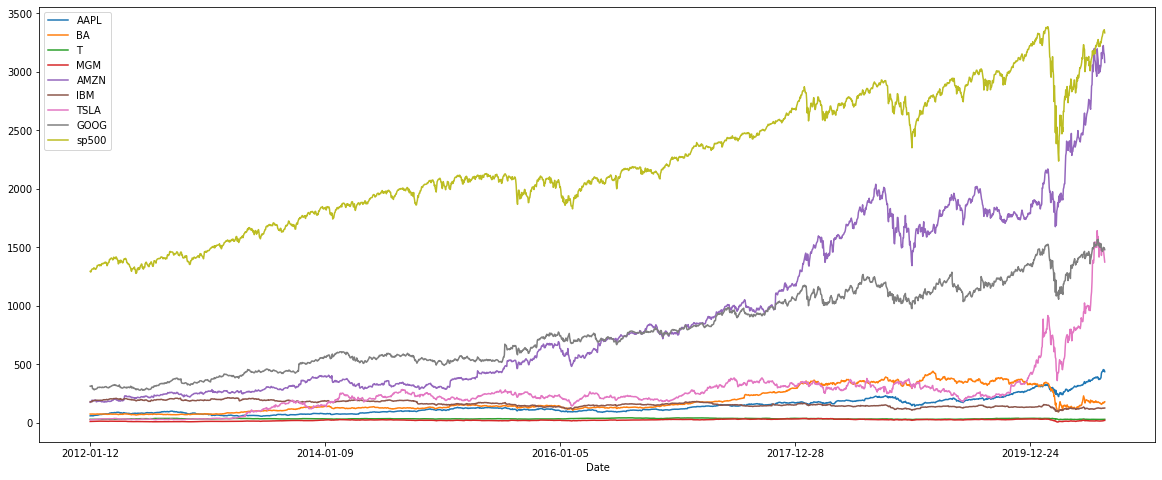

In [50]:
# lets plot the data
stock_df.plot(x='Date', figsize=(20,8));

### Interactive plot with plotly 

In [51]:
import plotly.express as px
fig = px.line()
for col in stock_df.columns[1:]:
  fig.add_scatter(x=stock_df['Date'], y=stock_df[col], name=col) 
fig.show()

## Calculate Daily Returns

### How do I calculate Daily return on stock?
* **Subtract the opening price from the closing price.** <br>
Locate the opening price of the stock and the closing price. Find the difference between the two prices to calculate the price change
* **Multiply the difference by the stocks you own** <br>
Find the total number of stocks, also known as shares, you own in the company. Take the difference between the opening and closing prices and multiply it by the shares you own to determine exactly how much your stock increased (or decreased) in value that day.
* **Divide the daily return by the current stock price and multiply by 100 to get a percentage.** <br>
If you want to find the percentage of your stock's daily return, take your daily return and divide it by the current stock price. Then, take that value and multiply it by 100 to find out the percentage of the return

In [64]:
daily_return = {}

for col in stock_df.columns[1:]:
  stock = stock_df[col].values
  daily_return[col] = [0]
  for idx in range(1,len(stock_df)):
    # Subtract the opening price from the closing price. 
    diff = stock[idx] - stock[idx-1]
    # Divide the daily return by the current stock price and multiply by 100 to get a percentage.
    percentage = (diff/stock[idx])*100
    daily_return[col].append(percentage)

In [67]:
daily_return_df = pd.DataFrame(data=daily_return)
daily_return_df['Date']=stock_df['Date']
daily_return_df.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,Date
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012-01-12
1,-0.376357,-1.219845,-0.166282,1.781377,1.395586,-0.775842,-23.957871,-0.744011,-0.497253,2012-01-13
2,1.151400,0.850611,0.595041,-0.816327,1.783555,0.466664,14.323305,0.571130,0.354038,2012-01-17
3,1.027710,-0.239808,0.263765,3.770621,4.106840,0.590936,0.783286,0.684143,1.098590,2012-01-18
4,-0.317945,0.661726,0.295858,0.546875,2.576495,-0.304677,-0.186842,1.041325,0.491439,2012-01-19


### Simple plot of Daily returns

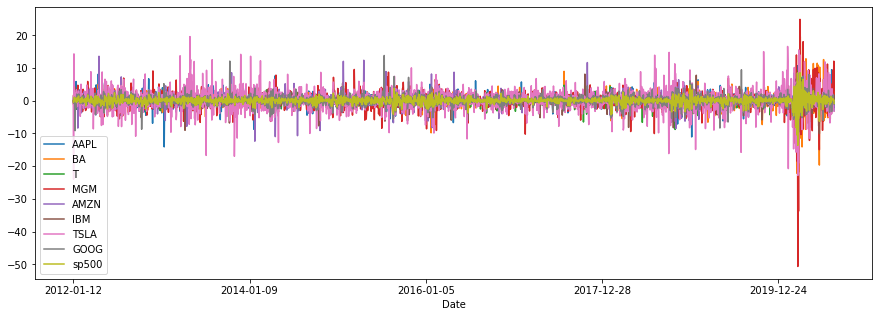

In [70]:
# Lets plot the daily returns
daily_return_df.plot(x='Date', figsize=(15,5));

### Interactive plot of daily returns

In [76]:
import plotly.express as ex

fig = ex.line(title='Daily return')
for col in stock_df.columns[1:]:
  fig.add_scatter(x=daily_return_df['Date'], y=daily_return_df[col], name=col)
fig.show()

## Correlation

**Covariance can classify three kind of relationship** 
* Relationship with a Positive trend
* Relationship with a Negative trend
* No Trend

Covariance = Positive value indicate a Positive trend<br>
Covariance = Negative value indicate a Negative trend<br>
Covariance = Zero indicate no trend<br>

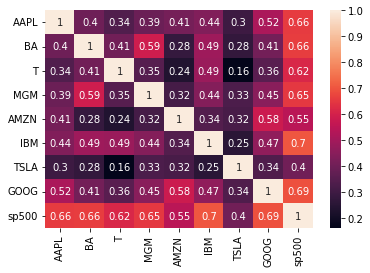

In [83]:
correlation = daily_return_df.drop(columns=['Date']).corr()
sns.heatmap(correlation, annot=True);

## Histogram of daily returns

Investors want to reduce risk and by using a Histogram we can get insights about the distribution of daily returns.

Histogram condenses a data series into an easily interpreted visual by taking many data points and grouping them into logical ranges or bins.

From the distribution returned by a histogram we can find out which stocks are more likely to give us a positive return and which are risky to invest.


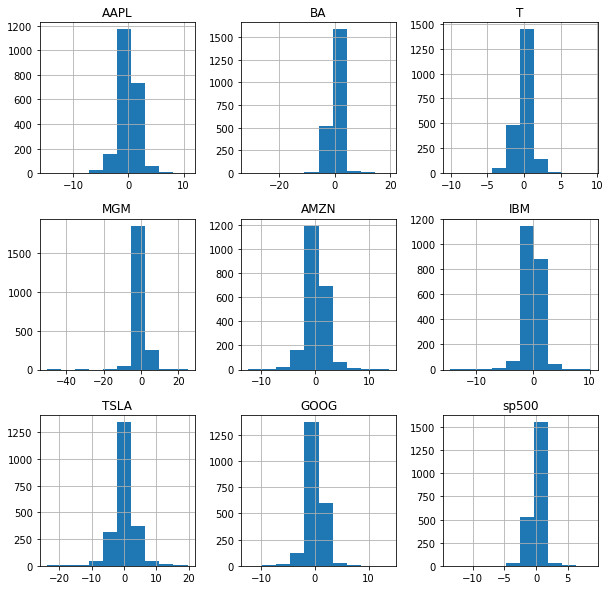

In [91]:
daily_return_df.hist(figsize=(10,10));

### Interactive plot 

In [93]:
data = []
for vals in daily_return.values():
  data.append(vals)

In [100]:
import plotly.figure_factory as ff

fig = ff.create_distplot(data, stock_df.columns[1:])
fig.show()

## Noramalize the data to similar range for better convergence

In ML when we train a model using data, if the mean and variance of the features are all over the place it will affect the training.
What we can do is to scale down the values to a similar range so that model converges fast

In [52]:
# let's check the mean and standard deviation of the features
stock_df.describe().iloc[:3]

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727


In [53]:
# lets scale the data to zero mean unit variance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stock_scaled = scaler.fit_transform(stock_df.iloc[:,1:])

In [54]:
# create a dataframe using the scaled data
stock_scaled_df = pd.DataFrame(data=stock_scaled, columns=stock_df.columns[1:])

In [55]:
stock_scaled_df.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,-1.138538,-1.103981,-1.572590,-1.576469,-1.060283,0.731609,-1.096766,-1.405830,-1.718642
1,-1.141726,-1.112760,-1.588183,-1.544870,-1.056714,0.677218,-1.122650,-1.412757,-1.730574
2,-1.131860,-1.106586,-1.532051,-1.559233,-1.052070,0.710087,-1.104588,-1.407409,-1.722048
3,-1.122964,-1.108323,-1.507103,-1.490289,-1.040919,0.751956,-1.103592,-1.400958,-1.695298
4,-1.125707,-1.103499,-1.479038,-1.480235,-1.033738,0.730435,-1.103829,-1.391036,-1.683273


In [56]:
# lets add back the date column
stock_scaled_df['Date'] = stock_df['Date']
stock_scaled_df.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,Date
0,-1.138538,-1.103981,-1.572590,-1.576469,-1.060283,0.731609,-1.096766,-1.405830,-1.718642,2012-01-12
1,-1.141726,-1.112760,-1.588183,-1.544870,-1.056714,0.677218,-1.122650,-1.412757,-1.730574,2012-01-13
2,-1.131860,-1.106586,-1.532051,-1.559233,-1.052070,0.710087,-1.104588,-1.407409,-1.722048,2012-01-17
3,-1.122964,-1.108323,-1.507103,-1.490289,-1.040919,0.751956,-1.103592,-1.400958,-1.695298,2012-01-18
4,-1.125707,-1.103499,-1.479038,-1.480235,-1.033738,0.730435,-1.103829,-1.391036,-1.683273,2012-01-19


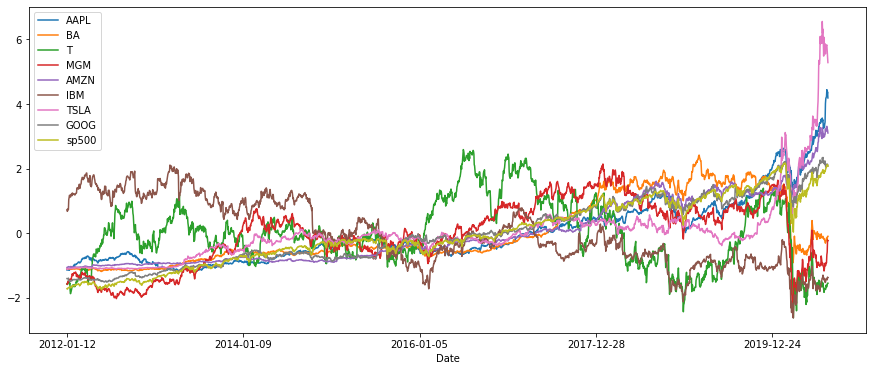

In [57]:
# now lets plot the data  # standardScaler bring the features to a common scale 
stock_scaled_df.plot(x='Date', figsize=(15,6));